In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Функция для визуализации матриц
def plot_matrix(matrix, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False, square=True, linewidths=1, linecolor='black')
    plt.title(title)
    plt.show()

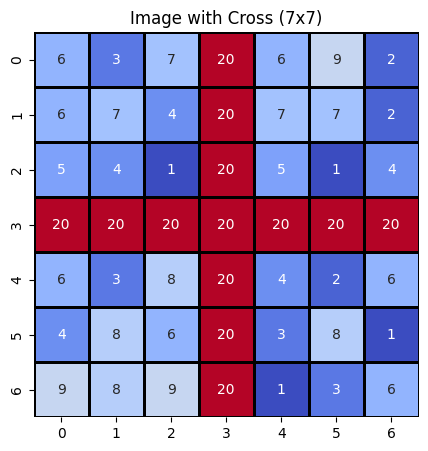

In [16]:
# Создаем случайную матрицу изображения с рисунком креста
np.random.seed(42)  # Для воспроизводимости
image_with_cross = np.random.randint(0, 10, (7, 7))

# Добавляем крестик в изображение (значения выше остальных для визуализации)
image_with_cross[3, :] = 20  # Горизонтальная часть креста
image_with_cross[:, 3] = 20  # Вертикальная часть креста


# Визуализация изображения с крестом
plot_matrix(image_with_cross, 'Image with Cross (7x7)')

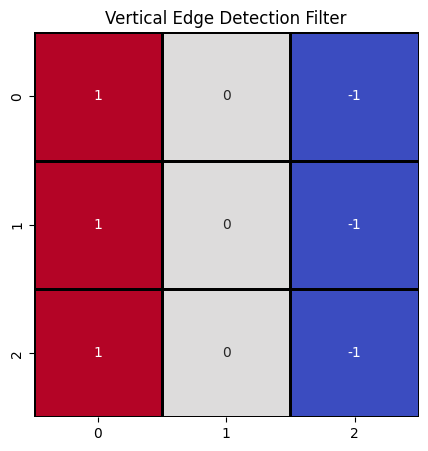

In [17]:
# Создаем фильтр для нахождения вертикальных границ (Sobel фильтр)
vertical_edge_filter = np.array([[1, 0, -1],
                                 [1, 0, -1],
                                 [1, 0, -1]])

# Визуализация фильтра для нахождения вертикальных границ
plot_matrix(vertical_edge_filter, 'Vertical Edge Detection Filter')


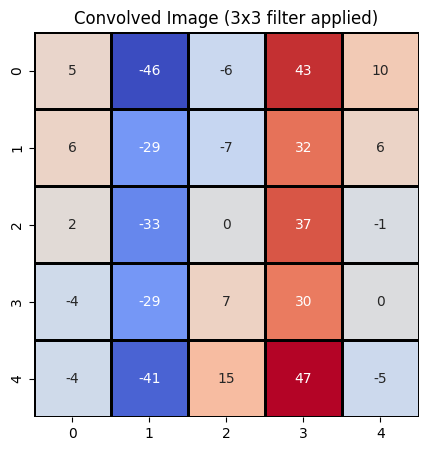

In [19]:
# Свёртка
def apply_convolution(image, conv_filter):
    image_h, image_w = image.shape
    filter_h, filter_w = conv_filter.shape
    output_h = image_h - filter_h + 1
    output_w = image_w - filter_w + 1
    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            region = image[i:i+filter_h, j:j+filter_w]
            output[i, j] = np.sum(region * conv_filter)

    return output

# Применяем свертку к изображению
convolved_image = apply_convolution(image_with_cross, vertical_edge_filter)

# Визуализация свёрнутого изображения
plot_matrix(convolved_image, 'Convolved Image (3x3 filter applied)')

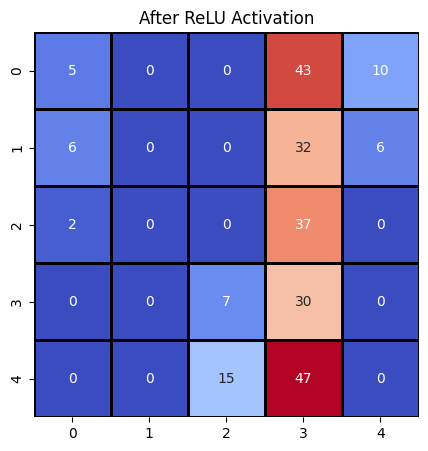

In [20]:
# Применяем функцию активации (ReLU)
relu_image = np.maximum(0, convolved_image)

# Визуализация после функции активации ReLU
plot_matrix(relu_image, 'After ReLU Activation')